# Explore here

In [31]:
# Your code here
import pandas as pd

URL= "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"

total_data = pd.read_csv(URL)
total_data.drop(columns = ["id"], inplace = True)
total_data.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [32]:
total_data.shape

(48895, 15)

In [33]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month               


Tipos de datos por columnas: decimales (3), númericos (6) y objetos (6)
- Hay un total de  48895 filas (en este caso, pisos) y 14 columnas, entre las que encontramos el objetivo o clase a predecir, `price`.
- Las variables `Last_Review` y `reviews_per_moth`  contienen 10.052 valores nulos.El 20% del total de los valores

In [34]:
#total_data.drop("columna que desamos eliminar del análisis de duplicados", axis = 1).duplicated().sum()
#En este caso ya se eliminó el "Index", valor que podría estár mal generado y confundir en el análisis de duplicados

ELIMINAR DUPLICADOS

In [35]:
total_data.duplicated().sum()

np.int64(0)

No aparecen filas con valores duplicados

In [36]:
#total_data = total_data.drop_duplicates(subset = total_data.columns.difference([''])) # en caso de tener duplicados los borramos
print(total_data.shape)
total_data.head()

(48895, 15)


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


ELIMINAR INFORMACIÓN IRRELEVANTE

In [40]:
total_data.drop(["name", "host_id", "host_name","latitude","longitude"], axis = 1, inplace = True)

total_data.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


ANALISIS DE VARIABLES CATEGÓRICAS

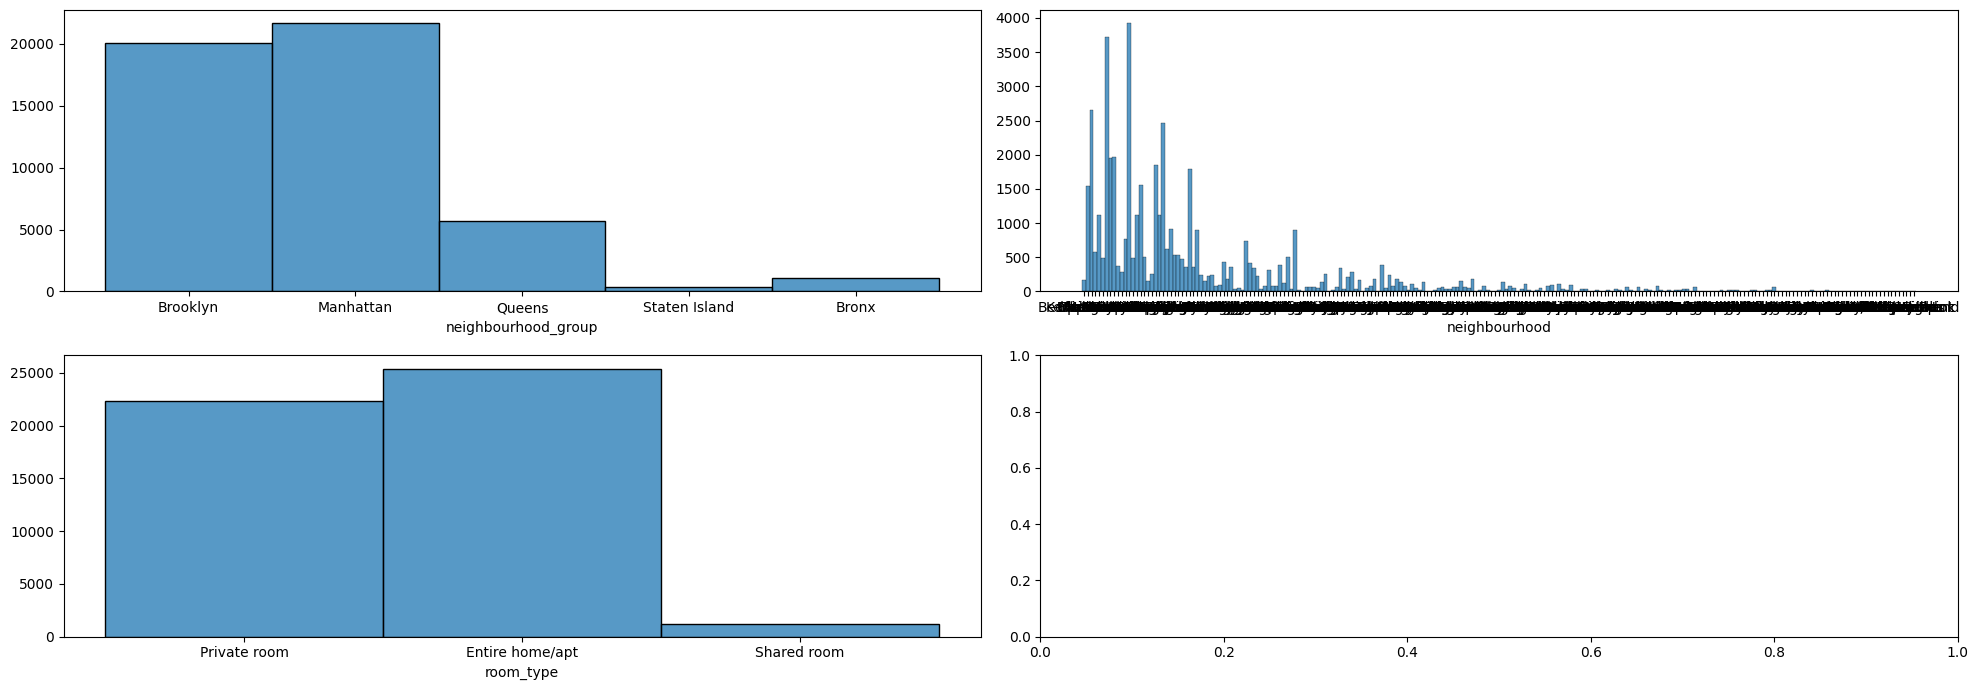

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axis = plt.subplots(2, 2, figsize = (20, 7))

# Create a multiple histogram

sns.histplot(ax = axis[0, 0], data = total_data, x = "neighbourhood_group").set(ylabel = None)
sns.histplot(ax = axis[0, 1], data = total_data, x = "neighbourhood").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = total_data, x = "room_type").set(ylabel = None)


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

VARIABLES NUMÉRICAS

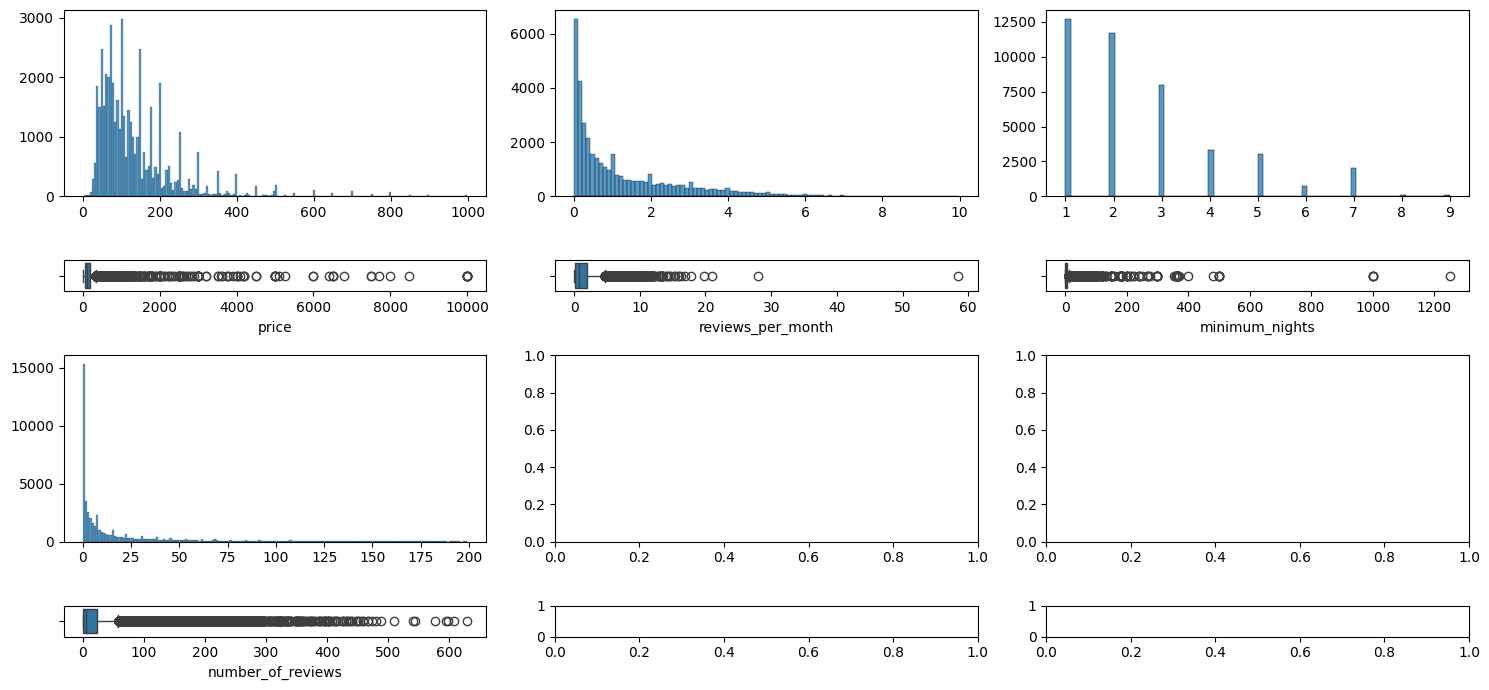

In [45]:
fig, axis = plt.subplots(4, 3, figsize = (15, 7), gridspec_kw={'height_ratios': [6,1,6,1]})


# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = total_data[total_data['price']<1000], x = "price").set(xlabel = None,ylabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")
sns.histplot(ax = axis[0, 1], data = total_data[total_data['reviews_per_month']<10], x = "reviews_per_month").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "reviews_per_month")
sns.histplot(ax = axis[0, 2], data = total_data[total_data['minimum_nights']<10], x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_data, x = "minimum_nights")
sns.histplot(ax = axis[2, 0], data = total_data[total_data["number_of_reviews"]<200], x = "number_of_reviews").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = "number_of_reviews")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()